In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
from matplotlib_venn import venn3, venn3_circles
import matplotlib.lines as lines
from astropy import constants as const
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
from astropy.table import Table
# import ephem
from astropy.cosmology import FlatLambdaCDM

In [2]:
### Samples as of 12/15/19
spec_121519 = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_121519.csv')
mac_121519 = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_121519.csv')
zoo_121519 = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_121519.csv')

In [6]:
# Opening GAMA MagPhys data from G09, G12, and G15 (DR3)
hdul = fits.open('/home/shawn/Desktop/gravitational_lensing_research/FITS_Files/MagPhys.fits')  # open a FITS file
hdul.verify('fix')
gama_data = hdul[1].data  # assume the first extension is a table
print(gama_data.columns)

ColDefs(
    name = 'CATAID'; format = 'J'; null = -2147483648
    name = 'Z'; format = 'E'
    name = 'f_mu_SFH_best_fit'; format = 'E'
    name = 'f_mu_SFH_percentile2_5'; format = 'E'
    name = 'f_mu_SFH_percentile16'; format = 'E'
    name = 'f_mu_SFH_percentile50'; format = 'E'
    name = 'f_mu_SFH_percentile84'; format = 'E'
    name = 'f_mu_SFH_percentile97_5'; format = 'E'
    name = 'f_mu_IR_best_fit'; format = 'E'
    name = 'f_mu_IR_percentile2_5'; format = 'E'
    name = 'f_mu_IR_percentile16'; format = 'E'
    name = 'f_mu_IR_percentile50'; format = 'E'
    name = 'f_mu_IR_percentile84'; format = 'E'
    name = 'f_mu_IR_percentile97_5'; format = 'E'
    name = 'mu_parameter_best_fit'; format = 'E'
    name = 'mu_parameter_percentile2_5'; format = 'E'
    name = 'mu_parameter_percentile16'; format = 'E'
    name = 'mu_parameter_percentile50'; format = 'E'
    name = 'mu_parameter_percentile84'; format = 'E'
    name = 'mu_parameter_percentile97_5'; format = 'E'
    name = 

In [7]:
gama_id = gama_data['CATAID']
gama_mass = gama_data['mass_stellar_best_fit']
gama_z = gama_data['Z']

gama_list = list(zip(gama_id,gama_mass,gama_z))

gama = pd.DataFrame(gama_list, columns = ['GAMA_ID','MASS','Z'])


In [6]:
gama# = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/gama_id_mass_z.csv')

# GAMA DR3 Details

In [8]:
gama_details = pd.DataFrame({'Mean' : [gama.MASS.mean(),gama.Z.mean()],
                           'Median' : [gama.MASS.median(),gama.Z.median()],
                            'Min' : [gama.MASS.min(),gama.Z.min()],
                            'Max' : [gama.MASS.max(),gama.Z.max()],
                            'Std' : [gama.MASS.std(),gama.Z.std()]}, index =['GAMA Stellar Mass', 'GAMA Redshift']
                                      )

In [9]:
gama_details

,Mean,Median,Min,Max,Std
GAMA Stellar Mass,5.678123e+10,3.642500e+10,3403.000,3.608000e+12,6.901061e+10
GAMA Redshift,2.144889e-01,1.968000e-01,0.001,4.607900e+00,1.173826e-01


# Spec Details

In [10]:
spec_121519_details = pd.DataFrame({'Mean' : [spec_121519.STELLAR_MASS.mean(),spec_121519.z1.mean()],
                           'Median' : [spec_121519.STELLAR_MASS.median(),spec_121519.z1.median()],
                            'Min' : [spec_121519.STELLAR_MASS.min(),spec_121519.z1.min()],
                            'Max' : [spec_121519.STELLAR_MASS.max(),spec_121519.z1.max()],
                            'Std' : [spec_121519.STELLAR_MASS.std(),spec_121519.z1.std()]}, index =['Spec Stellar Mass', 'Spec Redshift']
                                      )

In [11]:
spec_121519_details

,Mean,Median,Min,Max,Std
Spec Stellar Mass,6.107481e+10,5.741500e+10,5.747000e+09,1.438000e+11,4.122988e+10
Spec Redshift,2.644783e-01,2.690000e-01,1.090000e-01,5.290000e-01,9.691368e-02


In [13]:
#spec_v_gama = pd.concat([spec_121519_details, gama_details])
spec_v_gama = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_v_gama_massredshift.csv')
spec_v_gama

,Unnamed: 0,Mean,Median,Min,Max,Std
0,Spec Stellar Mass,6.107481e+10,5.741500e+10,5.747000e+09,1.438000e+11,4.122988e+10
1,Spec Redshift,2.644783e-01,2.690000e-01,1.090000e-01,5.290000e-01,9.691368e-02
2,GAMA Stellar Mass,5.678123e+10,3.642500e+10,3.403000e+03,3.608000e+12,6.901061e+10
3,GAMA Redshift,2.144889e-01,1.968000e-01,1.000000e-03,4.607900e+00,1.173826e-01


# Mac Details

In [14]:
mac_121519_details = pd.DataFrame({'Mean' : [mac_121519.STELLAR_MASS.mean(),mac_121519.Z.mean(),'~ 2e+11,','NA','NA','NA'],
                           'Median' : [mac_121519.STELLAR_MASS.median(),mac_121519.Z.median(),'NA','0.33','2.00e+11','0.19'],
                            'Min' : [mac_121519.STELLAR_MASS.min(),mac_121519.Z.min(),'most > 1e+11','~ 0.1','3.16e+10','0.063'],
                            'Max' : [mac_121519.STELLAR_MASS.max(),mac_121519.Z.max(),'NA','~ 0.5','6.31e+11','0.513'],
                            'Std' : [mac_121519.STELLAR_MASS.std(),mac_121519.Z.std(), 'NA','NA','NA','NA']}, index =['Mac Stellar Mass', 'Mac Redshift','Petrillo Mass','Petrillo Redshift','SLACS Mass','SLACS Redshift']
                                      )

In [15]:
mac_121519_details
# from Petrillo 2018 : "Consistently with Petrillo et al. (2017), 
#the selected candi-dates  have  redshifts  in  the  window
# 0.1∼<z∼<0.5,  with  amedian value of 0.33, while the stellar masses are typically larger than
#10^11M, with an average value of∼2×10^11M."

# from Auger 2018 : SLACS... 0.063 < z < 0.513, median 0.19... stellar mass range 10^(10.5)=3.16e+10 to 10^(11.8)=6.31e+11,
                                                                 # from Petrillo 2017: median 10^(11.3)=2.00e+11

,Mean,Median,Min,Max,Std
Mac Stellar Mass,2.5269e+11,2.2205e+11,9.873e+10,4.452e+11,1.04978e+11
Mac Redshift,0.312168,0.31535,0.106,0.4584,0.0772385
Petrillo Mass,"~ 2e+11,",NA,most > 1e+11,NA,NA
Petrillo Redshift,NA,0.33,~ 0.1,~ 0.5,NA
SLACS Mass,NA,2.00e+11,3.16e+10,6.31e+11,NA
SLACS Redshift,NA,0.19,0.063,0.513,NA


# Zoo Details

In [34]:
zoo_121519_details = pd.DataFrame({'Mean' : [zoo_121519.STELLAR_MASS.mean(),zoo_121519.Z.mean()],
                           'Median' : [zoo_121519.STELLAR_MASS.median(),zoo_121519.Z.median()],
                            'Min' : [zoo_121519.STELLAR_MASS.min(),zoo_121519.Z.min()],
                            'Max' : [zoo_121519.STELLAR_MASS.max(),zoo_121519.Z.max()],
                            'Std' : [zoo_121519.STELLAR_MASS.std(),zoo_121519.Z.std()]}, index =['Stellar STELLAR_MASS', 'Redshift']
                                      )

In [35]:
zoo_121519_details

,Mean,Median,Min,Max,Std
Stellar STELLAR_MASS,3.253343e+10,1.216000e+10,1.620000e+08,2.866000e+11,6.201457e+10
Redshift,1.168476e-01,1.202000e-01,4.500000e-02,1.461000e-01,2.904835e-02


In [10]:
zoo_data = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_with_mass.csv')

In [11]:
zoo_details = pd.DataFrame({'Mean' : [zoo_121519.STELLAR_MASS.mean(),zoo_121519.Z.mean(),zoo_data.STELLAR_MASS.mean(),zoo_data.Z.mean()],
                           'Median' : [zoo_121519.STELLAR_MASS.median(),zoo_121519.Z.median(),zoo_data.STELLAR_MASS.median(),zoo_data.Z.median()],
                            'Min' : [zoo_121519.STELLAR_MASS.min(),zoo_121519.Z.min(),zoo_data.STELLAR_MASS.min(),zoo_data.Z.min()],
                            'Max' : [zoo_121519.STELLAR_MASS.max(),zoo_121519.Z.max(),zoo_data.STELLAR_MASS.max(),zoo_data.Z.max()],
                            'Std' : [zoo_121519.STELLAR_MASS.std(),zoo_121519.Z.std(),zoo_data.STELLAR_MASS.std(),zoo_data.Z.std()]}, index =['Zoo Sample Stellar Mass', 'Zoo Sample Redshift','GalaxyZoo Stellar Mass','GalaxyZoo Redshift']
                                      )
zoo_details

,Mean,Median,Min,Max,Std
Zoo Sample Stellar Mass,3.415200e+10,1.253500e+10,1.643000e+09,2.866000e+11,6.316887e+10
Zoo Sample Redshift,1.204400e-01,1.222500e-01,6.070000e-02,1.461000e-01,2.455493e-02
GalaxyZoo Stellar Mass,2.193038e+10,9.662000e+09,1.526000e+05,1.104000e+12,3.462619e+10
GalaxyZoo Redshift,1.007349e-01,1.076000e-01,2.800000e-03,1.526000e-01,3.500603e-02


# 12/22/19 SLACS revisited

In [8]:
slacs = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/slacs.csv')
slacs

,Unnamed: 0,Name,zlens,zsrc,rEin(kpc),log_MEin_M_sun,fChab stellarEin,f∗Ein,stellarEinfstellareff,log_Mstellar_M_sun_Chab,error_of_mass_chab,log_Mstellar_M_sun__Salpeter,error_of_mass_sal,MB,MV,MB0,MV0,stellar_mass_chabrier,theta_e_chabrier
0,0,SDSSJ0008−0004,0.440,1.192,6.59,11.55,0.27±0.09,0.50±0.16,0.79,11.38,0.14,11.64,0.14,-22.25±0.08,-22.94±0.08,-21.55±0.19,-22.33±0.18,2.398833e+11,0.963686
1,1,SDSSJ0029−0055,0.227,0.931,3.48,11.08,0.50±0.14,0.89±0.26,0.56,11.33,0.13,11.58,0.13,-21.93±0.12,-22.63±0.07,-21.52±0.12,-22.27±0.12,2.137962e+11,1.465660
2,2,SDSSJ0037−0942,0.195,0.632,4.95,11.47,0.40±0.06,0.71±0.10,0.78,11.48,0.06,11.73,0.06,-22.37±0.06,-23.06±0.06,-22.02±0.10,-22.76±0.10,3.019952e+11,1.522143
3,3,SDSSJ0044+0113,0.120,0.197,1.72,10.96,0.37±0.08,0.64±0.13,0.40,11.23,0.09,11.47,0.09,-21.67±0.15,-22.35±0.08,-21.42±0.12,-22.14±0.08,1.698244e+11,1.442883
4,4,SDSSJ0109+1500,0.294,0.525,3.05,11.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,SDSSJ0157−0056,0.513,0.924,4.89,11.41,0.51±0.12,0.90±0.20,0.84,11.50,0.10,11.74,0.10,-22.61±0.07,-23.30±0.06,-21.81±0.22,-22.59±0.20,3.162278e+11,0.753347
6,6,SDSSJ0216−0813,0.332,0.523,5.53,11.69,0.36±0.06,0.61±0.10,0.56,11.79,0.07,12.03,0.07,-23.01±0.05,-23.75±0.05,-22.53±0.10,-23.32±0.10,6.165950e+11,0.859159
7,7,SDSSJ0252+0039,0.280,0.982,4.40,11.25,0.40±0.12,0.71±0.21,0.86,11.21,0.13,11.46,0.13,-21.57±0.10,-22.29±0.07,-21.12±0.13,-21.90±0.13,1.621810e+11,1.276311
8,8,SDSSJ0330−0020,0.351,1.071,5.45,11.40,0.41±0.08,0.69±0.15,0.93,11.35,0.09,11.58,0.09,-22.19±0.09,-22.85±0.06,-21.60±0.16,-22.35±0.16,2.238721e+11,1.112335
9,9,SDSSJ0405−0455,0.075,0.810,1.14,10.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Comparison between GAMA, SLACS and Zoo
I got the SLACS stuff from literature. Now I'm following them up with my own analysis of the Auger 2009 data. My mean and median mass measurements (using Chabrier) are not what they gave: 2.45e10^11 and 2.26e10^11


In [14]:
gama_slacs_zoo = gama_details = pd.DataFrame({'Mean' : [gama.MASS.mean(),gama.Z.mean(),slacs.stellar_mass_chabrier.mean(),slacs.zlens.mean(),zoo_data.STELLAR_MASS.mean(),zoo_data.Z.mean()],
                           'Median' : [gama.MASS.median(),gama.Z.median(),slacs.stellar_mass_chabrier.median(),slacs.zlens.median(),zoo_data.STELLAR_MASS.median(),zoo_data.Z.median()],
                            'Min' : [gama.MASS.min(),gama.Z.min(),slacs.stellar_mass_chabrier.min(),slacs.zlens.min(),zoo_data.STELLAR_MASS.min(),zoo_data.Z.min()],
                            'Max' : [gama.MASS.max(),gama.Z.max(),slacs.stellar_mass_chabrier.max(),slacs.zlens.max(),zoo_data.STELLAR_MASS.max(),zoo_data.Z.max()],
                            'Std' : [gama.MASS.std(),gama.Z.std(),slacs.stellar_mass_chabrier.std(),slacs.zlens.std(),zoo_data.STELLAR_MASS.std(),zoo_data.Z.std()]}, index =['GAMA Stellar Mass', 'GAMA Redshift','SLACS Mass','SLACS Redshift','GalaxyZoo Stellar Mass','GalaxyZoo Redshift']
                                      )
gama_slacs_zoo.to_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/gama_slacs_zoo.csv')

In [15]:
# Reading in Data
spec = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/final_sample.csv')
spec_in_gama = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_in_gama.csv')
spec_with_mass = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_with_mass.csv')
spec_121319_sample = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_121319_sample.csv')

mac = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/linkstable_trimmed.csv')
mac_in_gama = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_in_gama.csv')
mac_in_gama_withgamaid = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_in_gama_withgamaid.csv')
mac_with_mass = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_with_mass.csv')
mac_hard_cut = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_hard_cut.csv')

zoo_in_gama = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_in_gama.csv')
zoo_in_gama_found_lens = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_in_gama_found_lens.csv')
zoo_20 = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_20.csv')
zoo_with_mass = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_with_mass.csv')
zoo_lens_with_mass = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_lens_with_mass.csv')
zoo_lens20_with_mass = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_lens20_with_mass.csv')
zoo_hard_cut = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_hard_cut.csv')

mac_and_spec_matches = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_and_spec_matches.csv')
mac_and_zoo_matches = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_and_zoo_matches.csv')
spec_and_zoo_matches = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_and_zoo_matches.csv')

### Added from paper revision 12/11/19
# Opening KiDS table
kids_data = pd.read_csv('~/Desktop/gravitational_lensing_research/Lens_Project_Files/KiDS_DR3_tile_table.csv')

### Added shawn_visual 12/12/19
shawn_visual = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/shawn_visual.csv')
spec_maybe_lens = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_maybe_lens.csv')
mac_maybe_lens = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_maybe_lens.csv')
zoo_maybe_lens = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_maybe_lens.csv')


### Samples as of 12/15/19
spec_121519 = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_121519.csv')
mac_121519 = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_121519.csv')
zoo_121519 = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_121519.csv')

/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 4., 2., 5., 3.,
        0., 0., 0.]),
 array([ 7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,
         9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  , 11.25,
        11.5 , 11.75, 12.  ]),
 <a list of 1 Patch objects>)

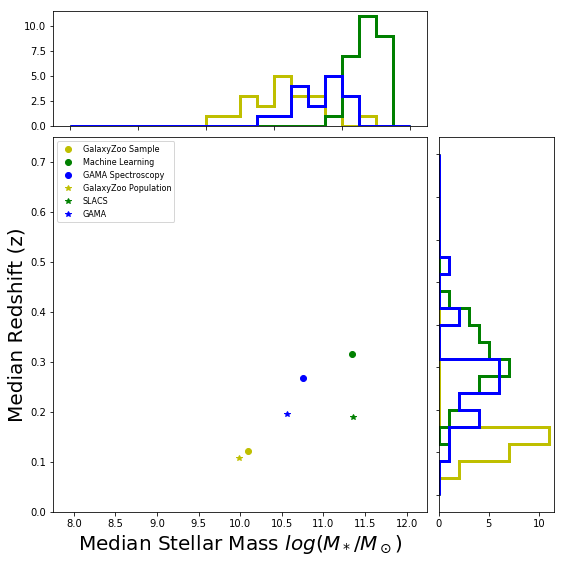

In [16]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plots
#axScatter.set_xlim((min(np.log10(zoo_hard_cut.STELLAR_MASS))-0.5, max(np.log10(mac_hard_cut.STELLAR_MASS))+0.5))
#axScatter.set_ylim((min(mac_hard_cut.Z)-0.05, max(mac_hard_cut.Z)+0.05))
axScatter.plot(np.log10(zoo_121519.STELLAR_MASS.median()),zoo_121519.Z.median(), 'yo',label='GalaxyZoo Sample')
axScatter.plot(np.log10(mac_121519.STELLAR_MASS.median()),mac_121519.Z.median(), 'go',label='Machine Learning')
axScatter.plot(np.log10(spec_121519.STELLAR_MASS.median()), spec_121519.z1.median(), 'bo',label='GAMA Spectroscopy')
axScatter.plot(np.log10(zoo_data.STELLAR_MASS.median()),zoo_data.Z.median(), 'y*',label='GalaxyZoo Population')
axScatter.plot(np.log10(slacs.stellar_mass_chabrier.median()),slacs.zlens.median(), 'g*',label='SLACS')
axScatter.plot(np.log10(gama.MASS.median()),gama.Z.median(), 'b*',label='GAMA')
axScatter.legend(loc='upper left', numpoints=1, fontsize = 8)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

axScatter.set_xlim((min(zoo_hard_cut.STELLAR_MASS)-0.5, max(zoo_hard_cut.STELLAR_MASS)+0.5))
axScatter.set_ylim((min(zoo_hard_cut.Z)-0.05, max(zoo_hard_cut.Z)+0.05))
axScatter.axis([7.75,12.25,0.,0.75], prop={'size':25})

axScatter.set_xlabel(r'Median Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Median Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo_121519.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(mac_121519.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(spec_121519.z1, orientation='horizontal', range=[0,0.8],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist(np.log10(zoo_121519.STELLAR_MASS), range=[7,12], bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(mac_121519.STELLAR_MASS), range=[7,12], bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(spec_121519.STELLAR_MASS), range=[7,12], bins=bins,color='b', histtype = 'step', linewidth=3)
    
#axHistx.set_xlim( axScatter.get_xlim() )
#axHisty.set_ylim( axScatter.get_ylim() )

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/revision_all_methods_mass_to_redshift_with_histograms.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/all_methods_median_mass_redshift.png')

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 4., 2., 5., 3.,
        0., 0., 0.]),
 array([ 7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,
         9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  , 11.25,
        11.5 , 11.75, 12.  ]),
 <a list of 1 Patch objects>)

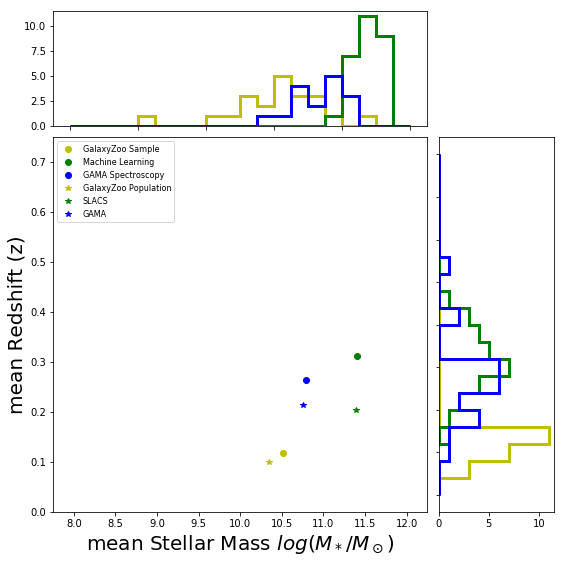

In [31]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plots
#axScatter.set_xlim((min(np.log10(zoo_hard_cut.STELLAR_MASS))-0.5, max(np.log10(mac_hard_cut.STELLAR_MASS))+0.5))
#axScatter.set_ylim((min(mac_hard_cut.Z)-0.05, max(mac_hard_cut.Z)+0.05))
axScatter.plot(np.log10(zoo_121519.STELLAR_MASS.mean()),zoo_121519.Z.mean(), 'yo',label='GalaxyZoo Sample')
axScatter.plot(np.log10(mac_121519.STELLAR_MASS.mean()),mac_121519.Z.mean(), 'go',label='Machine Learning')
axScatter.plot(np.log10(spec_121519.STELLAR_MASS.mean()), spec_121519.z1.mean(), 'bo',label='GAMA Spectroscopy')
axScatter.plot(np.log10(zoo_data.STELLAR_MASS.mean()),zoo_data.Z.mean(), 'y*',label='GalaxyZoo Population')
axScatter.plot(np.log10(slacs.stellar_mass_chabrier.mean()),slacs.zlens.mean(), 'g*',label='SLACS')
axScatter.plot(np.log10(gama.MASS.mean()),gama.Z.mean(), 'b*',label='GAMA')
axScatter.legend(loc='upper left', numpoints=1, fontsize = 8)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

axScatter.set_xlim((min(zoo_hard_cut.STELLAR_MASS)-0.5, max(zoo_hard_cut.STELLAR_MASS)+0.5))
axScatter.set_ylim((min(zoo_hard_cut.Z)-0.05, max(zoo_hard_cut.Z)+0.05))
axScatter.axis([7.75,12.25,0.,0.75], prop={'size':25})

axScatter.set_xlabel(r'mean Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'mean Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo_121519.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(mac_121519.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(spec_121519.z1, orientation='horizontal', range=[0,0.8],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist(np.log10(zoo_121519.STELLAR_MASS), range=[7,12], bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(mac_121519.STELLAR_MASS), range=[7,12], bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(spec_121519.STELLAR_MASS), range=[7,12], bins=bins,color='b', histtype = 'step', linewidth=3)
    
#axHistx.set_xlim( axScatter.get_xlim() )
#axHisty.set_ylim( axScatter.get_ylim() )

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/revision_all_methods_mass_to_redshift_with_histograms.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/all_methods_mean_mass_redshift.png')

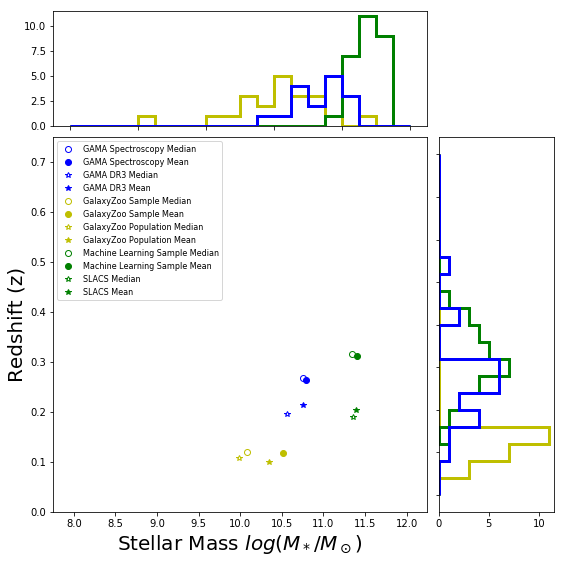

In [34]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plots
#axScatter.set_xlim((min(np.log10(zoo_hard_cut.STELLAR_MASS))-0.5, max(np.log10(mac_hard_cut.STELLAR_MASS))+0.5))
#axScatter.set_ylim((min(mac_hard_cut.Z)-0.05, max(mac_hard_cut.Z)+0.05))
axScatter.plot(np.log10(spec_121519.STELLAR_MASS.median()), spec_121519.z1.median(), 'bo',label='GAMA Spectroscopy Median', fillstyle = 'none')
axScatter.plot(np.log10(spec_121519.STELLAR_MASS.mean()), spec_121519.z1.mean(), 'bo',label='GAMA Spectroscopy Mean')
axScatter.plot(np.log10(gama.MASS.median()),gama.Z.median(), 'b*',label='GAMA DR3 Median', fillstyle = 'none')
axScatter.plot(np.log10(gama.MASS.mean()),gama.Z.mean(), 'b*',label='GAMA DR3 Mean')

axScatter.plot(np.log10(zoo_121519.STELLAR_MASS.median()),zoo_121519.Z.median(), 'yo',label='GalaxyZoo Sample Median', fillstyle = 'none')
axScatter.plot(np.log10(zoo_121519.STELLAR_MASS.mean()),zoo_121519.Z.mean(), 'yo',label='GalaxyZoo Sample Mean')
axScatter.plot(np.log10(zoo_data.STELLAR_MASS.median()),zoo_data.Z.median(), 'y*',label='GalaxyZoo Population Median', fillstyle = 'none')
axScatter.plot(np.log10(zoo_data.STELLAR_MASS.mean()),zoo_data.Z.mean(), 'y*',label='GalaxyZoo Population Mean')

axScatter.plot(np.log10(mac_121519.STELLAR_MASS.median()),mac_121519.Z.median(), 'go',label='Machine Learning Sample Median', fillstyle = 'none')
axScatter.plot(np.log10(mac_121519.STELLAR_MASS.mean()),mac_121519.Z.mean(), 'go',label='Machine Learning Sample Mean')
axScatter.plot(np.log10(slacs.stellar_mass_chabrier.median()),slacs.zlens.median(), 'g*',label='SLACS Median', fillstyle = 'none')
axScatter.plot(np.log10(slacs.stellar_mass_chabrier.mean()),slacs.zlens.mean(), 'g*',label='SLACS Mean')

axScatter.legend(loc='upper left', numpoints=1, fontsize = 8)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

axScatter.set_xlim((min(zoo_hard_cut.STELLAR_MASS)-0.5, max(zoo_hard_cut.STELLAR_MASS)+0.5))
axScatter.set_ylim((min(zoo_hard_cut.Z)-0.05, max(zoo_hard_cut.Z)+0.05))
axScatter.axis([7.75,12.25,0.,0.75], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo_121519.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(mac_121519.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(spec_121519.z1, orientation='horizontal', range=[0,0.8],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist(np.log10(zoo_121519.STELLAR_MASS), range=[7,12], bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(mac_121519.STELLAR_MASS), range=[7,12], bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(spec_121519.STELLAR_MASS), range=[7,12], bins=bins,color='b', histtype = 'step', linewidth=3)
    
#axHistx.set_xlim( axScatter.get_xlim() )
#axHisty.set_ylim( axScatter.get_ylim() )

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/revision_all_methods_mass_to_redshift_with_histograms.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/all_methods_mean_median_mass_redshift.png')